In [78]:
import pandas as pd
import numpy as np
import seaborn as sns

df = pd.read_csv("https://raw.githubusercontent.com/diogenesjusto/FIAP/master/Gradua%C3%A7%C3%A3o/dados/diamonds.csv")
df.head()


,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z
0,1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [97]:
df.columns

Index(['Unnamed: 0', 'carat', 'cut', 'color', 'clarity', 'depth', 'table',
       'price', 'x', 'y', 'z'],
      dtype='object')

In [79]:
df

,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z
0,1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75
...,...,...,...,...,...,...,...,...,...,...,...
53935,53936,0.72,Ideal,D,SI1,60.8,57.0,2757,5.75,5.76,3.50
53936,53937,0.72,Good,D,SI1,63.1,55.0,2757,5.69,5.75,3.61
53937,53938,0.70,Very Good,D,SI1,62.8,60.0,2757,5.66,5.68,3.56
53938,53939,0.86,Premium,H,SI2,61.0,58.0,2757,6.15,6.12,3.74


## Variavel = Price

### População

In [80]:
# Medidas da População
media_pop = df[['price']].mean()
mediana_pop = df[['price']].median()
max_pop = df[['price']].max()
min_pop = df[['price']].min()
desvio_pop = df[['price']].std()

print(f'Media: {media_pop}, Mediana: {mediana_pop}, Max: {max_pop}, Min: {min_pop}, Desvio: {desvio_pop}')

Media: price    3932.799722
dtype: float64, Mediana: price    2401.0
dtype: float64, Max: price    18823
dtype: int64, Min: price    326
dtype: int64, Desvio: price    3989.439738
dtype: float64


array([[<Axes: title={'center': 'price'}>]], dtype=object)

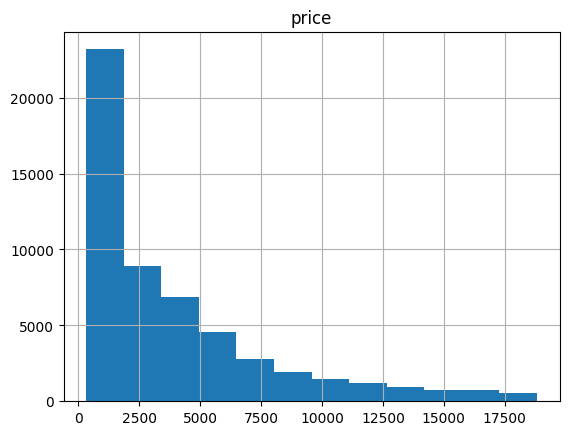

In [81]:
# Representação da distribuição de dados: histograma
df[['price']].hist(bins=12)

### Amostra

In [82]:
# determinando o tamanho da amostra com 30% da população
# Mas o ideal é tentar achar a menor amostra possível
tam_amostra = int(len(df) * 0.2)
tam_amostra

10788

In [83]:
# Criando no DF com as amostra
a3 = df.sample(tam_amostra)
a3.head()

,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z
53444,53445,0.71,Premium,E,SI1,60.3,60.0,2674,5.77,5.74,3.47
50501,50502,0.60,Ideal,H,IF,61.9,56.0,2270,5.40,5.45,3.36
18355,18356,1.04,Ideal,G,VS1,61.8,56.0,7467,6.50,6.52,4.02
28525,28526,0.31,Very Good,F,VS1,61.2,55.0,675,4.35,4.37,2.67
53039,53040,0.74,Ideal,G,VS2,61.3,55.0,2604,5.82,5.89,3.59


In [84]:
# Medidas da Amostra
media_am = a3[['price']].mean()
mediana_am = a3[['price']].median()
max_am = a3[['price']].max()
min_am = a3[['price']].min()
desvio_am = a3[['price']].std()

print(f'Media: {media_am}, Mediana: {mediana_am}, Max: {max_am}, Min: {min_am}, Desvio: {desvio_am}')

Media: price    3965.654245
dtype: float64, Mediana: price    2480.5
dtype: float64, Max: price    18804
dtype: int64, Min: price    336
dtype: int64, Desvio: price    3989.373518
dtype: float64


array([[<Axes: title={'center': 'price'}>]], dtype=object)

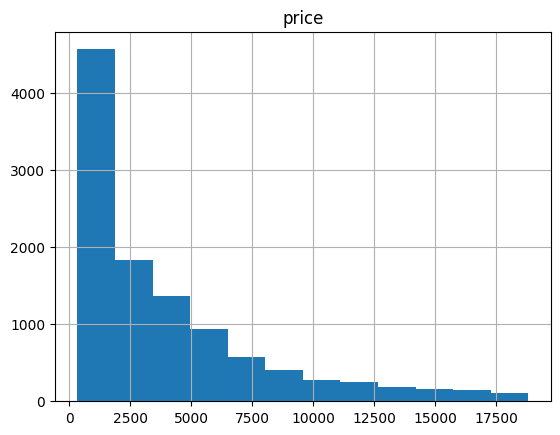

In [85]:
# Representação da distribuição de dados: histograma
a3[['price']].hist(bins=12)

### Comparação entre População VS Amostra

In [86]:
print(round((media_am - media_pop) / media_pop * 100, 2))
print(round((mediana_am - mediana_pop) / media_pop * 100, 2))
print(round((max_am - max_pop) / max_pop * 100, 2))
print(round((min_am - min_pop) / min_pop * 100, 2))
print(round((desvio_am - desvio_pop) / desvio_pop * 100, 2))

price    0.84
dtype: float64
price    2.02
dtype: float64
price   -0.1
dtype: float64
price    3.07
dtype: float64
price   -0.0
dtype: float64


* Podemos concluir que a amostra está com dados bons para trabalhar

## Filtrando apenas os Cortes "IDEAL"

In [87]:
df_ideal = df[df['cut'] == 'Ideal']
df_ideal

,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z
0,1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
11,12,0.23,Ideal,J,VS1,62.8,56.0,340,3.93,3.90,2.46
13,14,0.31,Ideal,J,SI2,62.2,54.0,344,4.35,4.37,2.71
16,17,0.30,Ideal,I,SI2,62.0,54.0,348,4.31,4.34,2.68
39,40,0.33,Ideal,I,SI2,61.8,55.0,403,4.49,4.51,2.78
...,...,...,...,...,...,...,...,...,...,...,...
53925,53926,0.79,Ideal,I,SI1,61.6,56.0,2756,5.95,5.97,3.67
53926,53927,0.71,Ideal,E,SI1,61.9,56.0,2756,5.71,5.73,3.54
53929,53930,0.71,Ideal,G,VS1,61.4,56.0,2756,5.76,5.73,3.53
53935,53936,0.72,Ideal,D,SI1,60.8,57.0,2757,5.75,5.76,3.50


In [88]:
# Medidas da População
ideal_media_pop = df_ideal[['price']].mean()
ideal_mediana_pop = df_ideal[['price']].median()
ideal_max_pop = df_ideal[['price']].max()
ideal_min_pop = df_ideal[['price']].min()
ideal_desvio_pop = df_ideal[['price']].std()

print(f'Media: {ideal_media_pop}, Mediana: {ideal_mediana_pop}, Max: {ideal_max_pop}, Min: {ideal_min_pop}, Desvio: {ideal_desvio_pop}')

Media: price    3457.54197
dtype: float64, Mediana: price    1810.0
dtype: float64, Max: price    18806
dtype: int64, Min: price    326
dtype: int64, Desvio: price    3808.401172
dtype: float64


In [89]:
max_pop

,0
price,18823


In [90]:
ideal_max_pop

,0
price,18806


,0
price,99.909685


<ipython-input-108-929e3d66e3c1>:10: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation=90)


AttributeError: module 'seaborn' has no attribute 'plt'

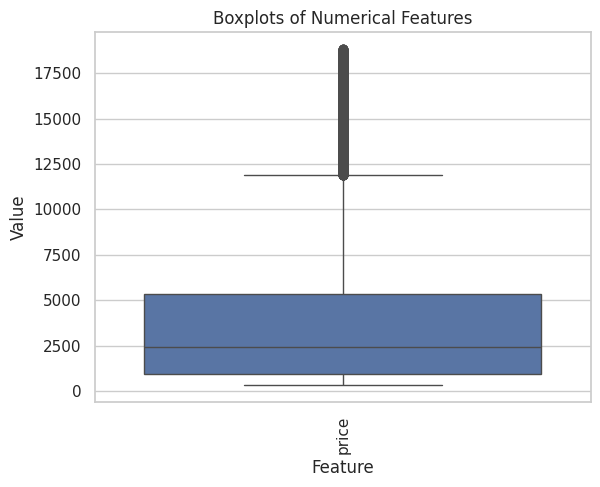

In [108]:
df_ideal = df.drop(columns=['Unnamed: 0'])

df_melted = df_ideal.melt(value_vars=['price'],
                    var_name='Feature', value_name='Value')

sns.set(style="whitegrid")
ax = sns.boxplot(x='Feature', y='Value', data=df_melted)

ax.set_title('Boxplots of Numerical Features')
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)

sns.plt.show()